In [1]:
import warnings
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from Progenesis import MergedProgenesisData, ProgenesisData
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load individual Progenesis export
When loading a Progenesis export, a few methods will be called automatically. For example, when annotated features have the same 'Accepted Description' we merge these features together and remove the original features. 

In [2]:
ProData = ProgenesisData("Data/Pos/181210_UMETA_POS.csv", mode="pos")

Data/Pos/181210_UMETA_POS.csv


/home/u041686/anaconda3/envs/py364/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,63,68,69,70,71,72,73) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(15413, 48)
Sum: ('Methionine', 'Methioninesulfoxide')
Sum: ('Glutamine', 'Glutamic acid / N-Methyl-D-Aspartic acid')
Sum: ('Aspartic acid', 'Asparagine')
Merging compounds and remove column: 2-Aminoadipic acid* 0.93_161.0688n,0.93_203.1026m/z*
Merging compounds and remove column: 2-Aminoadipic acid* M+H-H2O, M+H,M+ACN+H*
Merging compounds and remove column: Citrulline 0.84_175.0957n,0.85_176.1029m/z*
Merging compounds and remove column: Citrulline M+Na, M+K,M+H*
Merging compounds and remove column: Formiminoglutamic acid* 0.93_157.0608m/z,0.92_175.0713m/z*
Merging compounds and remove column: Formiminoglutamic acid* M+H-H2O,M+H*
Merging compounds and remove column: Glucosamine /Mannosamine / Galactosamine* 0.82_180.0865m/z,0.78_218.0422m/z*
Merging compounds and remove column: Glucosamine /Mannosamine / Galactosamine* M+H,M+K*
Merging compounds and remove column: Glutamine 0.81_146.0690n,0.92_129.0658m/z*
Merging compounds and remove column: Glutamine M+H, M+Na, M+K,M+H-H2O*
Merging c

In [3]:
ProData.data.head()

Accepted Description,686.88794,822.86357,618.90081,215.9993,550.91471,317.05534,482.92678,349.01696,898.83776,932.83224,...,313.90482,219.21057**,163.99045,249.02338,346.03389,70.94184****,179.06124,Methionine + Methioninesulfoxide,Glutamine + Glutamic acid / N-Methyl-D-Aspartic acid,Aspartic acid + Asparagine
sample_104,22249.4,18481.9,13511.1,0,11939.7,0,10970.9,0,14233.2,12042.5,...,1113.78,178.186,342720,266.449,3592.38,184.081,336.397,56311.7,198617,9116.33
sample_105,12428.9,9708.83,8267.7,0,8027.14,0,7175.5,0,3902.02,7159.73,...,1077.5,995.651,420484,176.072,3699.06,193.74,526.765,40499.5,54196.1,7881.98
sample_106,10021,7859.74,6551.12,0,8013.67,0,6501.44,0,3763.01,3229.88,...,960.468,1145.31,324786,269.928,3642.13,209.202,314.187,73966.6,84686.5,8730.63
sample_107,10717.6,12261.4,9452.11,0,7185.12,0,6954.05,0,6182.83,4045.47,...,803.335,1181.75,453266,235.639,3182.46,206.631,196.276,111875,39422.4,10601.4
sample_108,19747.5,17447.8,11846.5,0,11773.8,0,10592.6,0,10620.5,11305.1,...,353.571,621.9,2.95691e+06,106.621,2591.38,742.563,244.861,35110.5,64264.6,8461.95


In [4]:
ProData.data.tail()

Accepted Description,686.88794,822.86357,618.90081,215.9993,550.91471,317.05534,482.92678,349.01696,898.83776,932.83224,...,313.90482,219.21057**,163.99045,249.02338,346.03389,70.94184****,179.06124,Methionine + Methioninesulfoxide,Glutamine + Glutamic acid / N-Methyl-D-Aspartic acid,Aspartic acid + Asparagine
Highest Mean,NOR,NOR,NOR,QC,NOR,QC,NOR,QC,NOR,NOR,...,PAT,QC,NOR,QC,PAT,NOR,QC,QCQC,PATPAT,PATQC
Lowest Mean,QC,QC,QC,NOR,QC,NOR,QC,NOR,QC,QC,...,QC,PAT,PAT,PAT,NOR,PAT,PAT,PATPAT,NORNOR,NORPAT
Isotope Distribution,100 - 9.81 - 1.57,100 - 10.8 - 1.68,100 - 7.31 - 0.7,100 - 0.843 - 0.157,100 - 6.2 - 0.487,100 - 10.7 - 0.129,100 - 5.36 - 0.625,100 - 8.81,100 - 23.3 - 7.04,100 - 22 - 8.34,...,100 - 12.3,100 - 14.8,100 - 1.98,100 - 2.34,100 - 7.96,100 - 28.5,100 - 4.15,100 - 0.72 - 0.364 - 0.194 - 0.0463100 - 0.553...,100 - 0.48 - 0.229 - 0.136100 - 0.704 - 0.0593...,100 - 8.57 - 0.0714100 - 20.1 - 0.461
Maximum Abundance,18845.5,16662.1,13028.1,12709.3,12131.7,11396.4,10969.3,10661.3,9442.46,9197.13,...,944.43,1984.09,1.02461e+06,225.267,3584.74,337.492,584.155,131191,139417,21931
Minimum CV%,8.22,16.97,13.29,4.11,11,93.43,7.87,26.02,23.75,19.29,...,37.86,43.38,102.55,18.86,12.63,54.68,57.74,30.91,7.44,20.6


# Merge (8) batches 
The first agument of 'MergedProgenesisData' is a list of paths to the Progenesis exports which need to be merged. The first export is the reference batchs. Automatically, retention times will be corrected between the reference batch and the batch being merged. Merging batches is done on 4 levels:

1) Annotated features with the same name ('Accepted Description') will be pooled to the merged dataset

2) On MS/MS similarity score, retention time, neutral mass or m/z-value, median abundancy difference and isotope-pattern.

3) On retention time, neutral mass, median abundancy difference and isotope-pattern. 

4) On retention time, m/z-value, median abundancy difference and isotope-pattern

<br><br>
**Make sure if you use your own data that naming the files is according to**:
* '_UMETA_' must be in de file name 
* The filename of the MSMS-file (.msp) must be exactly the same but '_UMETA_' must be replaced by '_MS2_'



In [ ]:
# This might take some time

with warnings.catch_warnings():
    MergProData = MergedProgenesisData(
        [
            "Data/Pos/190308_UMETA_POS.csv",
            "Data/Pos/190315_UMETA_POS.csv",
            "Data/Pos/190218_UMETA_POS.csv",
            "Data/Pos/181210_UMETA_POS.csv",
            "Data/Pos/181214_UMETA_POS.csv",
            "Data/Pos/181217_UMETA_POS.csv",
            "Data/Pos/190401_UMETA_POS.csv",
            "Data/Pos/190503_UMETA_POS.csv",
        ],
        mode="pos",
    )

In [6]:
# Show merged data
# The Retention time (min) is the retention time of the reference batch
MergProData.data.iloc[0:10]

Accepted Description,cis-Aconitic acid / trans-Aconitic acid,"2,5-Furandicarboxylic acid",Citric acid*,2-Aminoadipic acid,S-Sulphocysteine,Phenylalanine,Indole,Tryptophan,Aspartic acid,(allo)Isoleucine,...,596.28977,413.40961,429.40451,382.055,148.11606,568.53787,670.99502,87.06779,568.78852,93.06675*
m/z,175.024,139.003,215.016,144.065,201.984,166.086,159.092,205.097,134.045,132.102,...,596.29,413.41,429.405,382.055,148.116,568.538,670.995,87.0678,568.789,93.0667
Retention time (min),1.09388,1.52185,1.52185,0.9309,0.864983,3.58842,4.31773,4.31773,0.817517,1.80217,...,4.78325,9.35527,8.97132,0.883917,0.73295,4.7442,5.66265,7.84738,4.7442,3.5697
Isotope Distribution,100 - 0.98,100 - 6.44 - 0.817,100 - 6.82 - 1.41,100 - 1.3,100 - 1.33 - 0.781 - 0.181,100 - 0.523 - 0.0188,100 - 2.97,100 - 0.564 - 0.0873,100 - 1.54,100 - 0.427 - 0.00846,...,100 - 17.3,100 - 23.8,100 - 21.3,100 - 7.38,100,100 - 85 - 11,100 - 28.3,100,100 - 29.7 - 2.07,100 - 0.903
Accepted Compound ID,UMETA00141,UMETA00706,UMETA00143,UMETA00001,UMETA00071,UMETA00056,UMETA00040,UMETA00074,UMETA00015,UMETA00008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neutral mass (Da),174.016,156.006,192.027,NaN,200.977,165.079,117.058,204.09,NaN,131.095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compound,1.09_174.0164n,1.52_156.0058n,"1.52_192.0269n,1.52_230.9899m/z*",0.93_144.0655m/z,0.86_200.9765n,3.59_165.0789n,4.32_117.0578n,4.32_204.0898n,"0.82_134.0447m/z,0.81_156.0266m/z*",1.80_131.0946n,...,4.78_596.2898m/z,9.36_413.4096m/z,8.97_429.4045m/z,0.88_382.0550m/z,0.73_148.1161m/z,4.74_568.5379m/z,5.66_670.9950m/z,7.85_87.0678m/z,4.74_568.7885m/z,3.57_93.0667m/z
Adducts,"M+H-H2O, M+H","M+H-H2O, M+H","M+H-H2O, M+H, M+Na, 2M+Na,M+K*",M+H-H2O,"M+H, M+Na","M+H-H2O, M-NH3+H, M+H, M+Na, M+K","M-e, M+H, M+ACN+H","M-NH3+H, M+H, M+Na, M+K, 2M+H, 2M+Na","M+H,M+Na*","M+H, M+Na",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sample_132****,431.471,6588.71,20463.9,37192.6,43.0979,370165,22669.8,417237,2160.26,202608,...,1527.47,1096.19,1188.85,130.919,1120.71,6304.29,8768.77,21.2392,5998.42,260.858
sample_92*,626.201,12548.5,42250.1,6224.08,1024.08,746979,18144.3,1.17235e+06,5874.64,380170,...,3781,297.284,381.945,74.1455,1664.37,9324.53,6041.76,42.1751,7556.17,171.47
sample_213*****,153.22,5617.9,10394.6,9559.34,6.25115,333788,10461.3,167835,165.207,351865,...,1975.73,601.083,672.601,721.354,445.63,3435.56,10479.9,17.4724,2833.59,246.617


# Clustermap of merged batches

/home/u041686/anaconda3/envs/py364/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


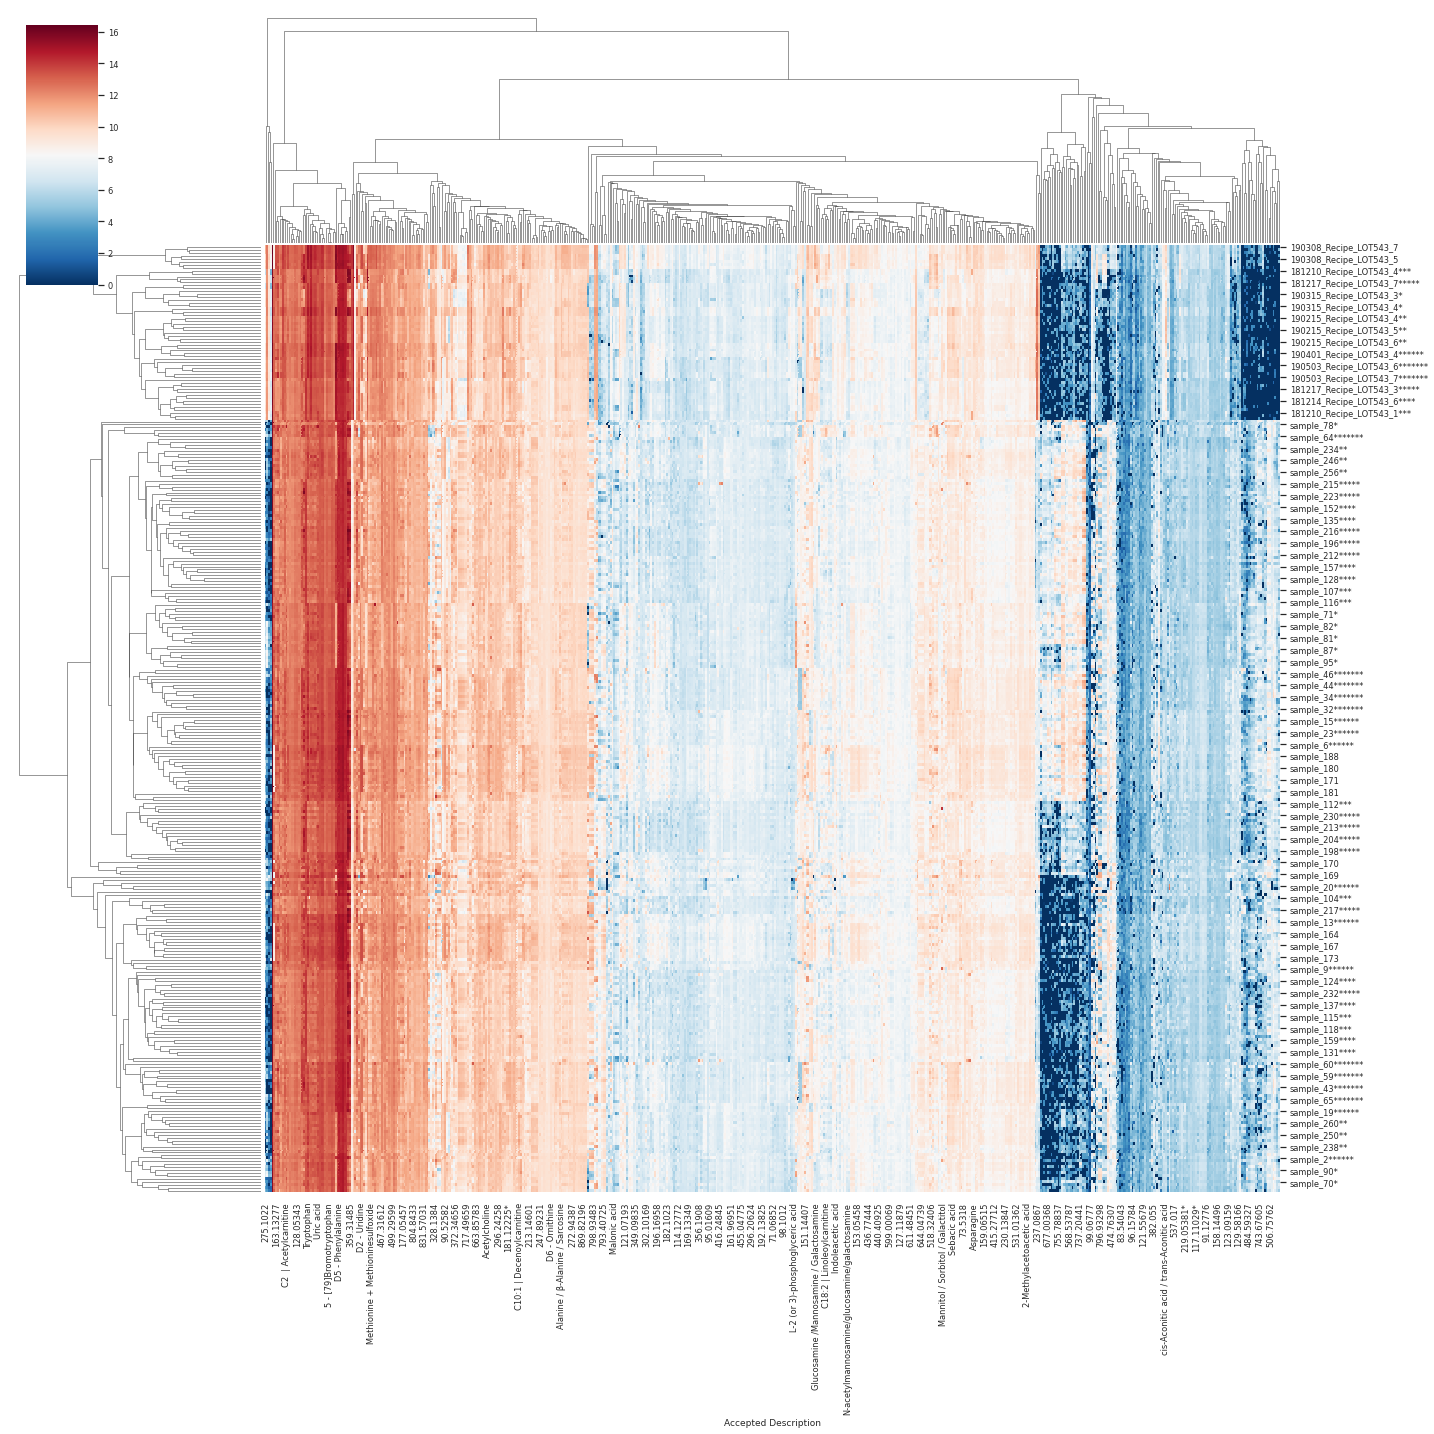

In [7]:
sns.set(font_scale=0.75)
sns.clustermap(
    MergProData.data.loc[MergProData.all_IDs].apply(np.float64).apply(np.log1p),
    cmap="RdBu_r",
    figsize=(20, 20),
)

# Check matching features between Reference batch and other batches

In [14]:
# Check matching from matching also MSMS data
ind = 0  # if 0 it means the matching of the first other batch (not ref batch)
# if 1, then you check the results from matching ref batch with second other batch etc.
MergProData.matches_from_msms[ind].drop(columns=["Compound_x", "Compound_y"]).head()

,columns_1,RT_1,nm_1,mz_1,Compound_1,columns_2,RT_2,nm_2,mz_2,Compound_2,median_abun_1,median_abun_2,median_error,ppm_error_mz,ppm_error_nm,possible_nms_2,min_ppm_error_possible_nms_2,possible_nms_1,min_ppm_error_possible_nms_1,similarity_score
3,130.00792,0.68615,147.011,130.008,0.69_147.0112n,130.00793*,0.69161,NaN,130.008,0.69_130.0079m/z,11450.59144,5321.678503,54.0,0.0792259,NaN,"[258.0012606, 236.0193606, 147.0112303, 129.00...",0.150329,NaN,NaN,0.939691
4,158.00281,0.68615,175.006,158.003,0.69_175.0061n,158.00282,0.69161,NaN,158.003,0.69_158.0028m/z,40117.13450,19758.909780,51.0,0.0436701,NaN,"[313.99103140000005, 292.0091314, 175.0061157,...",0.106853,NaN,NaN,0.947116
6,188.0004,9.65398,186.993,188,9.65_186.9931n,188.0004*,9.65413,NaN,188,9.64_188.0004m/z,30688.52043,43780.968900,43.0,0.0196808,NaN,"[373.9862016, 352.00430159999996, 205.0037008,...",0.145460,NaN,NaN,0.982687
9,127.13975,1.08452,126.132,127.14,1.08_126.1325n,127.13978,1.07892,NaN,127.14,1.07_127.1398m/z,177801.14050,98102.948100,45.0,0.218657,NaN,"[252.2649586, 230.2830586, 144.1430793, 126.13...",0.033298,NaN,NaN,0.902708
11,169.12217,1.58982,168.115,169.122,1.59_168.1150n,169.12218,1.58404,NaN,169.122,1.57_169.1222m/z,11757.64946,10203.126780,13.0,0.0857368,NaN,"[336.22976960000005, 314.2478696, 186.1254848,...",0.654314,NaN,NaN,0.975283


In [15]:
# Check matching from annotated features
MergProData.matches_from_identifications[ind].head()

,columns_1,RT_1,mz_1,nm_1,IsDi_1,Adducts_1,Compound_1,column_stripped,columns_2,RT_2,mz_2,nm_2,IsDi_2,Adducts_2,Compound_2,median_abun_1,median_abun_2,median_error
0,cis-Aconitic acid / trans-Aconitic acid,1.09388,175.024,174.016,100 - 0.98,"M+H-H2O, M+H",1.09_174.0164n,cis-aconitic acid / trans-aconitic acid,cis-Aconitic acid / trans-Aconitic acid,1.08848,157.013,NaN,100 - 3.15,M+H-H2O,1.08_157.0131m/z,915.821699,586.375260,36.0
1,Carnosine,0.808117,227.114,NaN,100 - 7.53,M+H,0.81_227.1136m/z,carnosine,Carnosine,0.815746,249.095,NaN,100 - 4.92,M+Na,0.81_249.0954m/z,1721.344223,23.432047,99.0
2,"2,5-Furandicarboxylic acid",1.52185,139.003,156.006,100 - 6.44 - 0.817,"M+H-H2O, M+H",1.52_156.0058n,"2,5-furandicarboxylic acid","2,5-Furandicarboxylic acid",1.52356,139.003,156.006,100 - 6.41 - 0.639,"M+H-H2O, M+H",1.51_156.0059n,18037.541030,13548.994320,25.0
3,Citric acid*,1.52185,215.016,192.027,100 - 6.82 - 1.41,"M+H-H2O, M+H, M+Na, 2M+Na,M+K*","1.52_192.0269n,1.52_230.9899m/z*",citric acid,Citric acid,1.51331,215.016,NaN,100 - 6.42 - 1.65,"M+Na,M+H-H2O, M+H, M+K, 2M+Na*","1.50_215.0161m/z,1.51_192.0270n*",97903.375962,45612.182280,53.0
4,2-Aminoadipic acid,0.9309,144.065,NaN,100 - 1.3,M+H-H2O,0.93_144.0655m/z,2-aminoadipic acid,2-Aminoadipic acid,0.922427,162.076,161.069,100 - 3.7,"M+H-H2O, M+H, M+ACN+H",0.92_161.0688n,2587.919089,7403.212051,186.0


In [16]:
# Check matching from neutral matches
MergProData.matches_from_nm[ind].head()

,columns_1,columns_2,Compound_1,Compound_2,RT_1,RT_2,nm_1,nm_2,IsDi_1,IsDi_2,ppm_error_nm,Adducts_1,Adducts_2,IsDi_errors,median_abun_1,median_abun_2,median_error
0,172.97436,172.9744,1.56_189.9777n,1.54_189.9777n,1.56105,1.55431,189.978,189.978,100 - 3.46 - 5.08 - 5.12,100 - 4.1,0.208972,"M+H-H2O, M+H","M+H-H2O, M+H","[0.0, 7.57, 50.4, 50.59]",809.856749,220.153563,73.0
1,413.26556,391.28366,9.99_390.2763n,9.98_390.2764n,9.99203,9.98998,390.276,390.276,100 - 27.7 - 1.62 - 0.0617,100 - 23.1 - 0.43 - 0.0163,0.112741,"M+Na, M+K, 2M+Na","M+H, M+Na, M+K, 2M+Na","[0.0, 14.07, 17.98, 0.9]",60543.855630,39311.334300,35.0
2,393.29027,393.29008,9.99_392.2830n,9.98_392.2828n,9.99203,9.98998,392.283,392.283,100 - 9.88 - 0.174,100 - 7.73 - 0.0438,0.46701,"M+H, M+Na","M+H, M+Na","[0.0, 14.45, 2.52]",2871.437845,599.365129,79.0
5,440.98033,440.9804,1.52_439.9733n,1.51_439.9733n,1.52185,1.52356,439.973,439.973,100 - 11.9 - 1.33,100 - 11.7 - 0.905,0.0327293,"M+H, M+2H","M+H, M+2H","[0.0, 1.18, 6.71]",1281.659740,1048.385803,18.0
6,437.9722,437.97227,1.52_437.9727n,1.51_437.9728n,1.52185,1.52356,437.973,437.973,100 - 10 - 2.32,100 - 11 - 2.03,0.169417,"M-e, M+H","M-e, M+H","[0.0, 6.67, 3.96]",10977.897290,8381.476020,24.0


In [17]:
# Check matching from mz matches
MergProData.matches_from_nm[ind].head()

,columns_1,columns_2,Compound_1,Compound_2,RT_1,RT_2,nm_1,nm_2,IsDi_1,IsDi_2,ppm_error_nm,Adducts_1,Adducts_2,IsDi_errors,median_abun_1,median_abun_2,median_error
0,172.97436,172.9744,1.56_189.9777n,1.54_189.9777n,1.56105,1.55431,189.978,189.978,100 - 3.46 - 5.08 - 5.12,100 - 4.1,0.208972,"M+H-H2O, M+H","M+H-H2O, M+H","[0.0, 7.57, 50.4, 50.59]",809.856749,220.153563,73.0
1,413.26556,391.28366,9.99_390.2763n,9.98_390.2764n,9.99203,9.98998,390.276,390.276,100 - 27.7 - 1.62 - 0.0617,100 - 23.1 - 0.43 - 0.0163,0.112741,"M+Na, M+K, 2M+Na","M+H, M+Na, M+K, 2M+Na","[0.0, 14.07, 17.98, 0.9]",60543.855630,39311.334300,35.0
2,393.29027,393.29008,9.99_392.2830n,9.98_392.2828n,9.99203,9.98998,392.283,392.283,100 - 9.88 - 0.174,100 - 7.73 - 0.0438,0.46701,"M+H, M+Na","M+H, M+Na","[0.0, 14.45, 2.52]",2871.437845,599.365129,79.0
5,440.98033,440.9804,1.52_439.9733n,1.51_439.9733n,1.52185,1.52356,439.973,439.973,100 - 11.9 - 1.33,100 - 11.7 - 0.905,0.0327293,"M+H, M+2H","M+H, M+2H","[0.0, 1.18, 6.71]",1281.659740,1048.385803,18.0
6,437.9722,437.97227,1.52_437.9727n,1.51_437.9728n,1.52185,1.52356,437.973,437.973,100 - 10 - 2.32,100 - 11 - 2.03,0.169417,"M-e, M+H","M-e, M+H","[0.0, 6.67, 3.96]",10977.897290,8381.476020,24.0


# Normalize data

In [18]:
from Metchalizer import (
    NormMetchalizer,
    NormPQN,
    NormBestCorrIS,
    NormMetchalizerLog,
    NormAnchor,
    LR_age_sex,
)

In [19]:
merged_data = MergProData.data.loc[MergProData.all_IDs].apply(np.float64)

# Rename the internal standards for using normalization method(s)
# We need to 'tag' the internal standards such that the normalization methods knowns
# which feature is a internal standard.
rename_IS = {
    "1,3 -[15]N Uracil*": "IS_0",
    "5 - [79]Bromotryptophan": "IS_1",
    "D10 - Isoleucine": "IS_2",
    "D3 - Carnitine": "IS_3",
    "D4 - Tyrosine": "IS_4",
    "D5 - Phenylalanine": "IS_5",
    "D6 - Ornithine": "IS_6",
    "Dimethyl - 3,3 - glutaric acid": "IS_7",
    "[13]C - Thymidine ": "IS_8",
}


# Rename
merged_data = merged_data.rename(columns=rename_IS)

# Here the amount of stars in the sample ID indicate the batch
batch_with_IDs = defaultdict(list)
for ID in merged_data.index:
    batch_with_IDs["batch_" + str(ID.count("*"))].append(ID)

### Choose normalization method

In [20]:
normalizer = NormMetchalizer(
    merged_data,
    batch_with_IDs,
    prefix_IS="IS_",
    prefix_QC_samples="Recipe_",
    remove_outliers_Z_threshold=3,
    interia_per_threshold=75,
    lambda_1=0.5,
    lambda_2=1,
)

normalizer_2 = NormAnchor(merged_data, dict(batch_with_IDs), tag_QC="Recipe")


## Other normalization methods
# normalizer = NormMetchalizerLog(merged_data, batch_with_IDs, prefix_IS= 'IS_', prefix_QC_samples = 'Recipe_',
#                              remove_outliers_Z_threshold = 5, interia_per_threshold=75)
# normalizer = NormPQN(merged_data)
# normalizer = NormBestCorrIS(merged_data,batch_with_IDs)

Total amount of standards: 9
Total amount of Anchor samples: 59


In [ ]:
# First normalization
with warnings.catch_warnings():
    normalizer.normalize()

In [22]:
# Second normalization
with warnings.catch_warnings():
    normalizer_2.normalize(addition=1)

Done with normalization


# PCA on batches

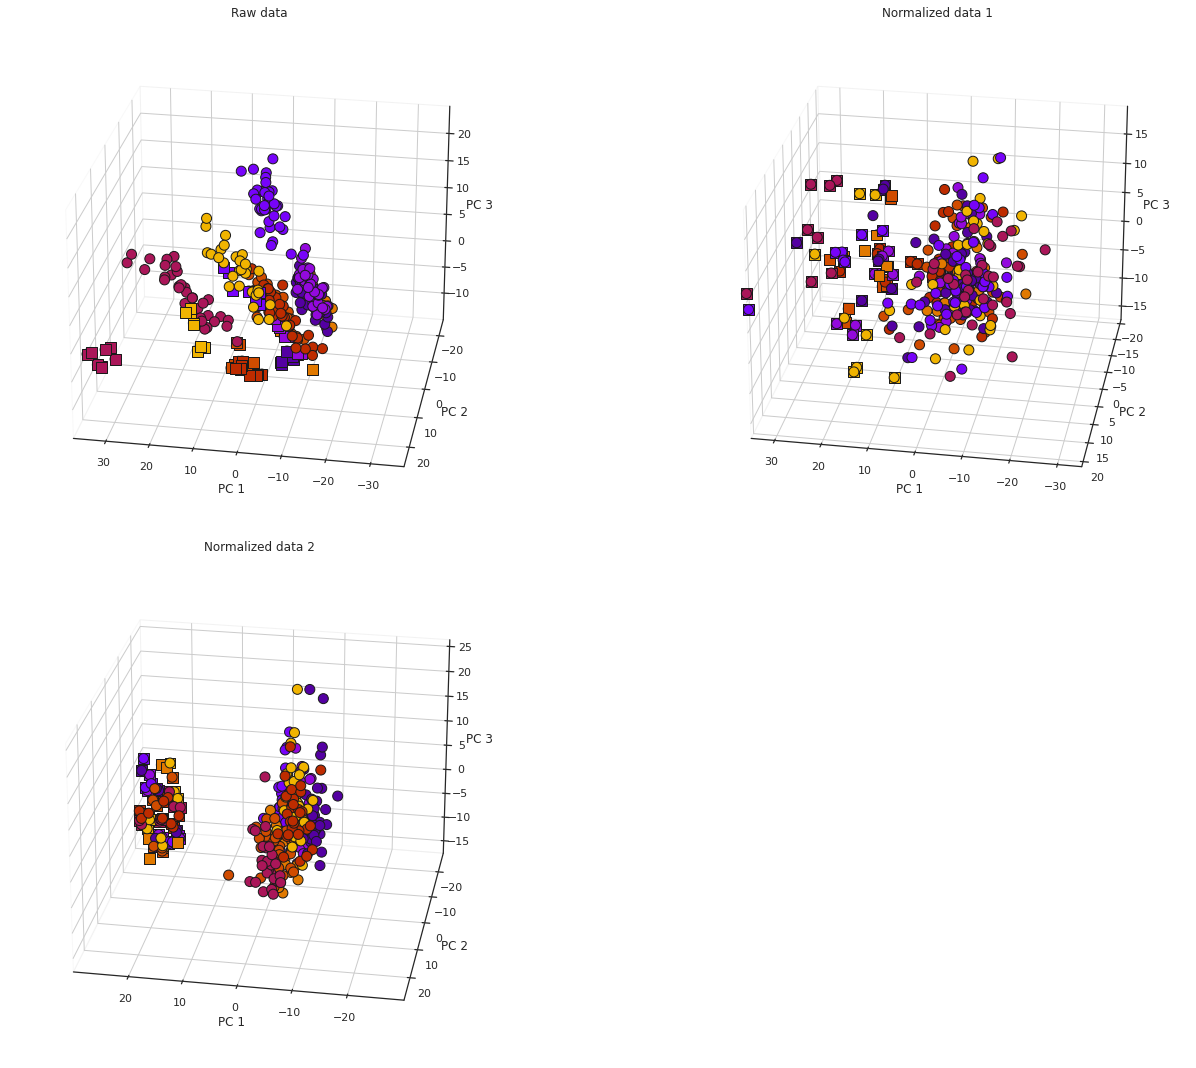

In [23]:
sns.set(context="notebook", style="white", font_scale=1)
colors = sns.color_palette("gnuplot", 8)

QC_IDs = [ID for ID in merged_data.index if "Recipe_" in ID]

dims = [(0, 1, 2)]
marker_size = 100

perc = 4  # percentile for determining x,y limits in plot
range_scale = 1.8  # Zoom factor w.r.t x,y limits determined from percentiles

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, (title, data) in enumerate(
    zip(
        ["Raw data", "Normalized data 1", "Normalized data 2"],
        [merged_data, normalizer.data_normalized, normalizer_2.data_normalized],
    )
):
    data_norm_scaled = (data - data.mean()) / data.std()
    tranformer = PCA(n_components=10)
    X_PCA = tranformer.fit_transform(data_norm_scaled.values)

    # Plot PCA with outliers
    for j, dim in enumerate(dims):
        ax = fig.add_subplot(2, 2, i + 1, projection="3d", facecolor="white")
        for k, (batch, IDs) in enumerate(batch_with_IDs.items()):
            x = data.index.isin(batch_with_IDs[batch])
            color_k = colors[k]
            ax.scatter(
                X_PCA[x, dim[0]],
                X_PCA[x, dim[1]],
                X_PCA[x, dim[2]],
                color=color_k,
                alpha=1,
                linewidths=1,
                edgecolor="k",
                s=marker_size,
            )

        for k, (batch, IDs) in enumerate(batch_with_IDs.items()):
            x = (data.index.isin(batch_with_IDs[batch])) & (data.index.isin(QC_IDs))
            color_k = colors[k]
            ax.scatter(
                X_PCA[x, dim[0]],
                X_PCA[x, dim[1]],
                X_PCA[x, dim[2]],
                color=color_k,
                s=marker_size * 1.2,
                marker="s",
                alpha=1,
                linewidth=1,
                edgecolor="k",
            )

        x_low, x_high = (
            np.percentile(X_PCA[:, dim[0]], perc) * range_scale,
            np.percentile(X_PCA[:, dim[0]], 100 - perc) * range_scale,
        )
        y_low, y_high = (
            np.percentile(X_PCA[:, dim[1]], perc) * range_scale,
            np.percentile(X_PCA[:, dim[1]], 100 - perc) * range_scale,
        )
        x_width = (x_high - x_low) / 2
        y_width = (y_high - y_low) / 2

        ax.set_xlim([-x_width, x_width])
        ax.set_ylim([-y_width, y_width])

        ax.set_xlabel("PC " + str(dim[0] + 1))
        ax.set_ylabel("PC " + str(dim[1] + 1))
        ax.set_zlabel("PC " + str(dim[2] + 1))
        ax.set_title(title)

        ax.xaxis.pane.fill = None
        ax.yaxis.pane.fill = None
        ax.zaxis.pane.fill = None

        ax.view_init(25, 100)

fig.tight_layout()

# Evaluation of batch effect removal

### WTR score
We evaluated batch effect removal by determining the ratio in the QC samples:

$ WTR= \frac{\sigma^2_{within}}{\sigma^2_{tot}} = \frac{\sigma^2_{tot} - \sigma^2_{between}}{\sigma^2_{tot}}$


### QC correlations
Normalization should not remove metabolic differences in the data. Therefore, we expect the resemblance between all measured QC samples (present in all batches) to remain or even improve after normalization. This resemblance is measured by calculating pair-wise Spearman correlations between all pairs of QC samples. 


### Batch prediction score
We fit a logistic regression curve using the first 4 PC's as covariates by labeling samples from the same batch as '1' and all other samples belonging to other batches with the label '0'. We determine per samples the probability either belonging to its batch. If this prediction becomes harder than that indicates that batch effects are reduced.


### QC prediction score
Since our QC samples have a different composition in concentration of several metabolites with respect to the human plasma samples, we expect these QC samples to be distinguishable from the human plasma samples in the first 4 PC space. Similar, to the batch prediction score we fit a logistic regression curve to determine this separation. Increased normalization performance is associated with higher QC prediction scores.


### Determine WTR scores from QC samples

In [24]:
WTR = []
for name_data, data in zip(
    ["Raw", "Normalized", "Normalized 2"],
    [normalizer.data, normalizer.data_normalized, normalizer_2.data_normalized]):
    for metab in data.columns:
        metab_means_per_batch = []
        x_metab_all = []
        for k, (batch, IDs) in enumerate(batch_with_IDs.items()):
            IDs_QC = [ID for ID in IDs if "recipe" in ID.lower()]

            x_metab = data.loc[IDs_QC, metab]
            x_metab_all.extend(x_metab.tolist())

            metab_means_per_batch.append(x_metab.mean())

        std_between = np.var(metab_means_per_batch)
        std_total = np.var(x_metab_all)
        WTR.append([name_data, metab, (std_total - std_between) / std_total])

WTR = pd.DataFrame(WTR, columns=["method", "Metab", "WTR"])

/home/u041686/anaconda3/envs/py364/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


### QC correlations

In [38]:
QC_correlations = []

for name_data, data in zip(
    ["Raw", "Normalized", "Normalized 2"],
    [normalizer.data, normalizer.data_normalized, normalizer_2.data_normalized]):
    # Get all QC samples in data
    IDs_QC = [ID for ID in data.index if "recipe" in ID.lower()]
    data_QC = data.loc[IDs_QC]
    
    corr_matrix = data_QC.T.corr('spearman')

    
    for ID, row in corr_matrix.iterrows():
        for rho in row.values:
            QC_correlations.append([name_data,rho])

QC_correlations = pd.DataFrame(QC_correlations, columns = ['method','corr'])

## Batch prediction scores

In [26]:
batch_pred_scores = []
for name_data, data in zip(
    ["Raw", "Normalized", "Normalized 2"],
    [normalizer.data, normalizer.data_normalized, normalizer_2.data_normalized]):

    # PCA transform
    tranformer = PCA(n_components=4, iterated_power=1000)
    
    Z = ( data - data.mean() ) / data.std()
    X_PCA = tranformer.fit_transform(Z.values)
    X_PCA = pd.DataFrame(X_PCA, index=Z.index)

    for k, (batch, IDs) in enumerate(batch_with_IDs.items()):
        # Make class labels 'in batch' versus 'other batch'
        y_10 = [1 if ID in IDs else 0 for ID in X_PCA.index]

        LR = LogisticRegression(
            penalty="l1", solver="saga", multi_class="multinomial", max_iter=10000
        )
        LR.fit(X_PCA, y_10)
        scores = list(LR.predict_proba(X_PCA)[X_PCA.index.isin(IDs), 1])

        for s, ID in zip(scores, X_PCA.loc[X_PCA.index.isin(IDs)].index):
            batch_pred_scores.append([ID, s, name_data, batch])

batch_pred_scores = pd.DataFrame(
    batch_pred_scores, columns=["ID", "batch_pred_score", "method", "batch"]
)

## QC prediction scores

In [27]:
QC_pred_scores = []
for name_data, data in zip(
    ["Raw", "Normalized", "Normalized 2"],
    [normalizer.data, normalizer.data_normalized, normalizer_2.data_normalized]):

    # PCA transform
    tranformer = PCA(n_components=4, iterated_power=1000)
    
    Z = ( data - data.mean() ) / data.std()
    X_PCA = tranformer.fit_transform(Z.values)
    X_PCA = pd.DataFrame(X_PCA, index=Z.index)

    # Make class labels 'QC' versus 'human plasma'
    y = X_PCA.index.str.contains("recipe", case=False)
    y_10 = np.array([1 if x == True else 0 for x in y])

    LR = LogisticRegression(
        penalty="l1", solver="saga", multi_class="auto", max_iter=10000
    )
    LR.fit(X_PCA, y_10)

    scores = LR.predict_proba(X_PCA)[y][:, 1]

    for s, ID in zip(scores, X_PCA.loc[y].index):
        QC_pred_scores.append([ID, s, name_data])

QC_pred_scores = pd.DataFrame(QC_pred_scores, columns=["ID", "QC_pred_score", "method"])

## Plot all performance metrics
Note, that WTR-scores and $\Delta R$'s for Anchor (when using the QC samples) are not representative for normalization performance. 

(0.0, 1.1)

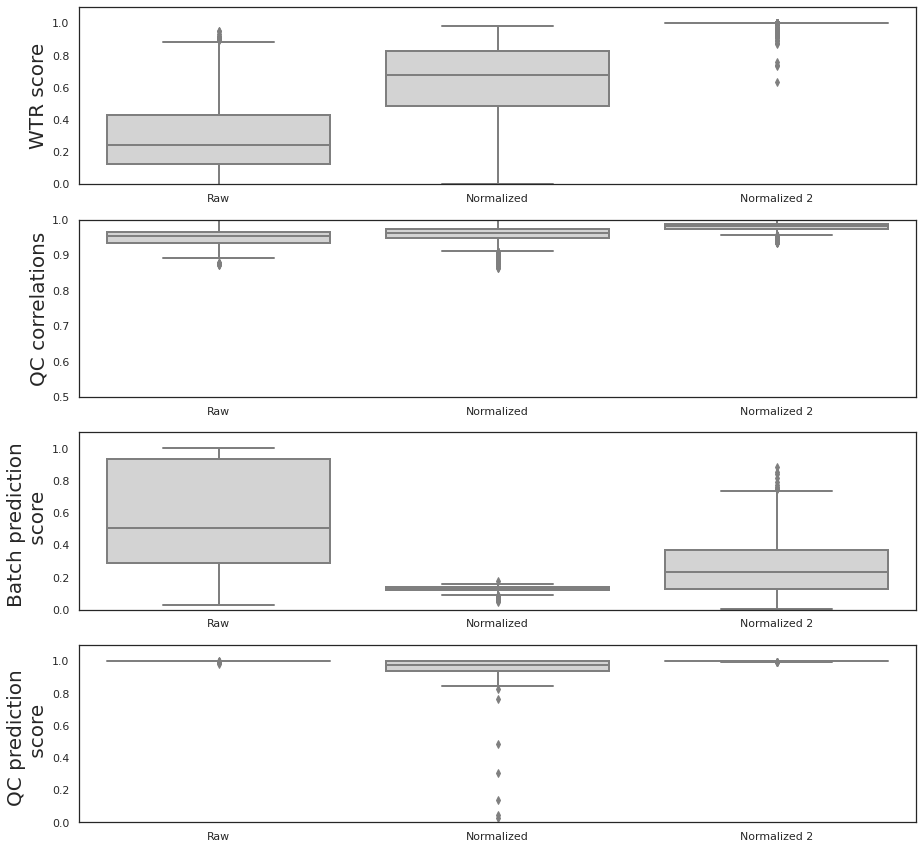

In [43]:
fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1, style="white")
ax = fig.add_subplot(4, 1, 1)
g = sns.boxplot(data=WTR, x="method", y="WTR", ax=ax, color="lightgrey", linewidth=2)
ax.set_ylabel("WTR score", fontsize=20)
ax.set_xlabel("")
ax.set_ylim([0, 1.1])


ax = fig.add_subplot(4, 1, 2)
g = sns.boxplot(
    data=QC_correlations, x="method", y="corr", ax=ax, color="lightgrey", linewidth=2
)
ax.set_ylabel(r"QC correlations", fontsize=20)
ax.set_xlabel("")
ax.set_ylim([0.5, 1])

ax = fig.add_subplot(4, 1, 3)
g = sns.boxplot(
    data=batch_pred_scores,
    x="method",
    y="batch_pred_score",
    ax=ax,
    color="lightgrey",
    linewidth=2,
)
ax.set_ylabel("Batch prediction \n score", fontsize=20)
ax.set_xlabel("")
ax.set_ylim([0, 1.1])

ax = fig.add_subplot(4, 1, 4)
g = sns.boxplot(
    data=QC_pred_scores,
    x="method",
    y="QC_pred_score",
    ax=ax,
    color="lightgrey",
    linewidth=2,
)
ax.set_ylabel("QC prediction \n score", fontsize=20)
ax.set_xlabel("")
ax.set_ylim([0, 1.1])

# Regression model

In [29]:
metadata_samples = pd.read_csv("Data/Sample_metadata.csv").drop(columns=["Unnamed: 0"])
norm_data = normalizer.data_normalized
metadata_samples = metadata_samples.assign(
    ID_in_data=metadata_samples["ID"].map({ID.strip("*"): ID for ID in norm_data.index})
).dropna()

age_sex_of_samples = metadata_samples.set_index("ID_in_data")[["Age_in_days", "Sex"]]
age_sex_of_samples["Sex"] = age_sex_of_samples["Sex"].apply(
    lambda x: 1 if x.lower() == "v" else 0
)

In [30]:
# Fit model
metabolite = norm_data.columns.tolist()[20]

model = LR_age_sex(a=1, b=1)
model = LR_age_sex(polynomials=3, a=365, b=1, Z_outlier_threshold=4)
X = age_sex_of_samples
y = norm_data.loc[age_sex_of_samples.index, metabolite]
model.fit(
    X, y, interaction=True
)  # interaction sex*age can be False or True. Offset in sex cannot be altered

Text(0.5, 0, 'Age')

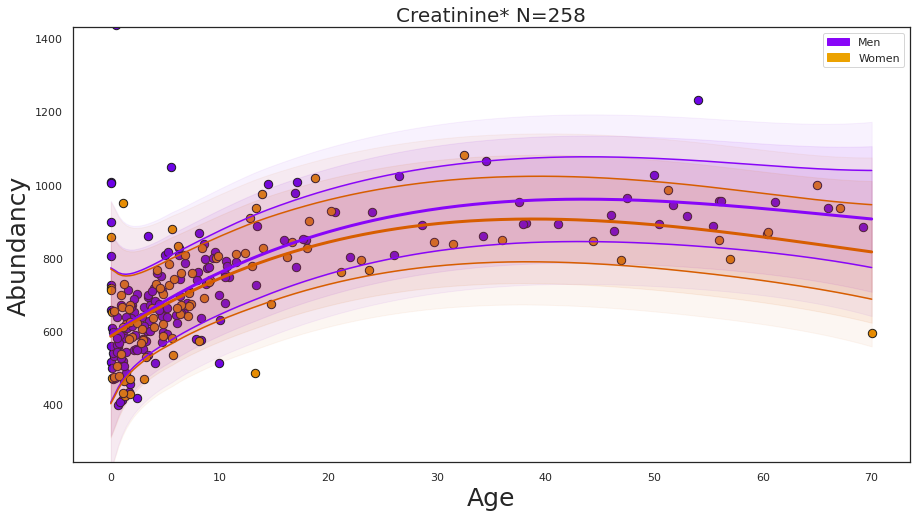

In [31]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
factor_age = 1 / 365  # The model uses age in days. For plotting we want years
scaling = 1  # Determines ylimits


colors = sns.color_palette("gnuplot", 10)
for col, (sex, data_gb) in zip([colors[1], colors[-2]], X.groupby("Sex")):
    ax.scatter(
        data_gb["Age_in_days"] * factor_age,
        y.loc[data_gb.index],
        alpha=0.99,
        color=col,
        s=70,
        linewidth=1,
        edgecolor="k",
    )


res = model.predict(X)
res.index = X.index
res = res.assign(y=y)

y_fit, y_std = res["y_pred"], res["std_pred"]
ax.set_ylim(
    [np.percentile(y_fit, 5) * (1 - scaling), np.percentile(y_fit, 95) * (1 + scaling)]
)

colors = sns.color_palette("gnuplot", 6)
amount = 200
new_legend = []
for col, women_men in zip([colors[1], colors[-2]], [0, 1]):
    X_fit = pd.DataFrame(
        [
            np.linspace(X["Age_in_days"].min(), X["Age_in_days"].max(), amount),
            np.ones(amount) * women_men,
        ]
    ).T
    X_fit.columns = ["Age_in_days", "Sex"]

    res_ = model.predict(X_fit)

    y_fit, y_std = res_["y_pred"], res_["std_pred"]

    ind = np.argsort(X_fit["Age_in_days"])
    ax.plot(
        X_fit["Age_in_days"].iloc[ind] * factor_age,
        y_fit.iloc[ind],
        c=col,
        linewidth=3,
        label=str(women_men),
    )
    ax.plot(
        X_fit["Age_in_days"].iloc[ind] * factor_age, (y_fit - y_std).iloc[ind], c=col
    )
    ax.plot(
        X_fit["Age_in_days"].iloc[ind] * factor_age, (y_fit + y_std).iloc[ind], c=col
    )
    intervals = np.linspace(1, 2, 3)
    for u in intervals:
        ax.fill_between(
            X_fit["Age_in_days"].iloc[ind] * factor_age,
            (y_fit - y_std * u).iloc[ind],
            (y_fit + y_std * u).iloc[ind],
            alpha=0.15 - np.diff(intervals)[0] * u / 10,
            color=col,
        )


patch_men = mpatches.Patch(color=colors[1], label="Men")
patch_women = mpatches.Patch(color=colors[-1], label="Women")
ax.legend(handles=[patch_men, patch_women])

ax.set_ylim([(y_fit - 5 * y_std).mean(), (y_fit + 5 * y_std).mean()])
ax.set_title(
    metabolite.lower().capitalize() + " " + "N=" + str(len(model.not_outlier_IDs)),
    fontsize=20,
)
ax.set_ylabel("Abundancy", fontsize=25)
ax.set_xlabel("Age", fontsize=25)

## Obtain significance of regression coefficients

In [32]:
model.p_values(n_bootstraps=100, train_size=0.9)

In [33]:
model.p_vals_fits.head()

,0,1,2,3,Sex,interaction
0,9.340141e-246,4.537186e-11,0.003587,0.134831,0.796131,0.086960
1,1.644732e-256,9.055667e-14,0.000094,0.009337,0.921350,0.162846
2,8.756630e-297,1.167080e-16,0.000080,0.030930,0.985600,0.098099
3,9.075501e-269,5.313096e-12,0.000809,0.042526,0.749866,0.360512
4,3.219544e-275,8.265599e-12,0.002406,0.109546,0.827456,0.054317


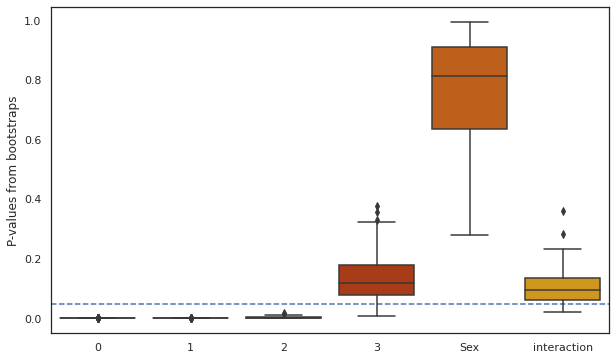

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(data=model.p_vals_fits, palette="gnuplot", ax=ax)
ax.set_ylabel("P-values from bootstraps")
ax.hlines(0.05, -0.5, 5.5, linestyle="--")